<a href="https://colab.research.google.com/github/mardgeer101/Colab-Notebooks/blob/main/08_TensorFlow_regression_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [9]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

In [12]:
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X, y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape

((1137, 6), (201, 6))

In [18]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [22]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, X_test_normal.shape

((1137, 11), (201, 11))

In [159]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics = ["mae"])

history = model.fit(X_train_normal, y_train, epochs=1000, callbacks=[callback], batch_size=16, verbose=1)

Epoch 1/1000
72/72 [==============================] - 2s 7ms/step - loss: 12735.7451 - mae: 12735.7451
Epoch 2/1000
72/72 [==============================] - 0s 5ms/step - loss: 8313.5615 - mae: 8313.5615
Epoch 3/1000
72/72 [==============================] - 0s 5ms/step - loss: 7250.8428 - mae: 7250.8428
Epoch 4/1000
72/72 [==============================] - 0s 4ms/step - loss: 6288.2148 - mae: 6288.2148
Epoch 5/1000
72/72 [==============================] - 0s 4ms/step - loss: 4818.1021 - mae: 4818.1021
Epoch 6/1000
72/72 [==============================] - 0s 3ms/step - loss: 3762.7842 - mae: 3762.7842
Epoch 7/1000
72/72 [==============================] - 0s 3ms/step - loss: 3589.2612 - mae: 3589.2612
Epoch 8/1000
72/72 [==============================] - 0s 2ms/step - loss: 3500.3606 - mae: 3500.3606
Epoch 9/1000
72/72 [==============================] - 0s 2ms/step - loss: 3416.0002 - mae: 3416.0002
Epoch 10/1000
72/72 [==============================] - 0s 2ms/step - loss: 3327.9683 - ma

In [161]:
model.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 1874.4840 - mae: 1874.4840


[1874.4840087890625, 1874.4840087890625]

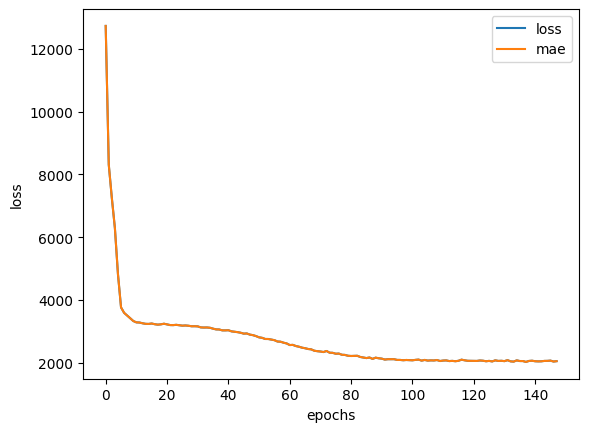

In [162]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [163]:
y_pred = model.predict(X_test_normal)
y_pred = tf.squeeze(y_pred)
y_test = tf.constant(y_test)
y_test = tf.cast(y_test, tf.float32)
i=143
print(y_test - y_pred)
print("predicted value:\t",y_pred[i])
print("label:\t\t\t",y_test[i])
print("Difference:\t\t", y_test[i] - y_pred[i])

7/7 [==============================] - 0s 2ms/step
tf.Tensor(
[-1.77053711e+02 -1.05485840e+02 -9.67972656e+02 -6.52324219e+01
  8.03644336e+03 -1.44578613e+02 -4.44592285e+01 -1.77144531e+02
 -1.35703857e+02 -1.09895508e+02 -9.95468750e+02 -3.58740234e+01
 -1.38063232e+02 -5.74949219e+03 -5.25094141e+03 -2.03522266e+03
 -2.15961914e+02  1.18139844e+03 -1.90469727e+02 -1.76117578e+03
 -1.00162109e+02 -1.22084473e+02 -6.44770508e+01 -1.76452148e+02
 -1.15740234e+02 -1.77850586e+02 -1.59597656e+02  1.35501201e+04
 -1.60667969e+02 -6.91425781e+01  7.41391406e+03 -2.46184570e+02
 -1.41514648e+02 -1.03689453e+02 -4.80239258e+01  2.04951172e+01
 -1.22621826e+02 -1.56644531e+02  2.10976562e+02  2.47310156e+03
 -1.15800293e+02 -4.80498047e+01 -2.16270508e+02 -1.49108398e+02
 -1.15532715e+02 -9.45449219e+01 -1.28975586e+02 -1.70410156e+02
  2.44114062e+03 -1.07567871e+02 -2.02517578e+02 -5.52980957e+01
  2.14551406e+04 -4.37724609e+01 -3.17716797e+02  1.50651904e+04
 -5.66376953e+01  5.36108203

In [164]:
tf.math.argmax(y_test-y_pred)

<tf.Tensor: shape=(), dtype=int64, numpy=143>